In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv('data/cleaned_data.csv', 
                   parse_dates=['Fully Paid','Approved']).drop(['Unnamed: 0'],axis=1)

In [5]:
# Select only the past 5 years of data to make sure the data is relevant
data = data[data['Fully Paid'] > '2014-05-15']

In [6]:
df_cat = pd.get_dummies(data[['Borough', 'Building Type', 'Efiling Filed',
        'Applicant Professional Title', 'Professional Cert']], drop_first = True)
df_cat['Duration'] = data['Duration']
df_cat = df_cat.rename(columns={'Building Type_OTHERS':'Building Type',
                                'Efiling Filed_Y':'Efiled',
                               'Applicant Professional Title_RA':'Pro Title',
                               'Professional Cert_Y':'Pro Certified'})
df_cat.head()

,Borough_BROOKLYN,Borough_MANHATTAN,Borough_QUEENS,Borough_STATEN ISLAND,Building Type,Efiled,Pro Title,Pro Certified,Duration
0,0,0,1,0,0,1,1,0,158.0
3,0,0,1,0,0,1,1,1,87.0
4,1,0,0,0,1,1,1,0,193.0
5,0,0,0,1,0,1,1,0,234.0
6,1,0,0,0,1,1,1,0,89.0


In [7]:
# Create a combined dataframe with the columns to use for prediction
df_combined = pd.merge(df_cat, data[['Total Est. Fee',
    'Proposed Zoning Sqft', 'Proposed No. Of Stories']], left_index=True, right_index=True)
df_combined.head(2)

,Borough_BROOKLYN,Borough_MANHATTAN,Borough_QUEENS,Borough_STATEN ISLAND,Building Type,Efiled,Pro Title,Pro Certified,Duration,Total Est. Fee,Proposed Zoning Sqft,Proposed No. Of Stories
0,0,0,1,0,0,1,1,0,158.0,243.0,2700,2
3,0,0,1,0,0,1,1,1,87.0,100.0,300,1


#### Linear Regression - Multivariate

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
# Create the X and y for the regression
X = df_combined.drop('Duration', axis=1)
y = np.log(df_combined['Duration'].values.reshape(-1,1))

In [29]:
# Create the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

# Create the regressor: reg
reg = LinearRegression()

# train the model
reg.fit(X_train, y_train)

# compute the real prediction on the test data
y_pred = reg.predict(X_test)

# Print R^2 
print("R^2 = {}".format(reg.score(X_test, y_test).round(3)))

R^2 = 0.386


In [30]:
# Cross-validate the results
# Import cross validation model.
from sklearn.model_selection import cross_val_score

In [31]:
# Obtain the R squared values by cross validation.
cv_results = cross_val_score(reg, X, y, cv=5)

# Get the mean value of the cross-validation results for R squared values.
mean_R2 = cv_results.mean().round(3)

print('Average 5-Fold cross-verification Score: {}'.format(mean_R2))

Average 5-Fold cross-verification Score: 0.325


#### Lasso Regression

* Helpful for feature selection. Identifies the most important variables.

In [13]:
from sklearn.linear_model import Lasso

In [34]:
# create the names of the variables
names = X.columns

# set the lasso variable
lasso = Lasso(alpha=0.1, normalize=True)
lasso_coef = lasso.fit(X,y).coef_
lasso_coef

array([ 0.,  0., -0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0.])

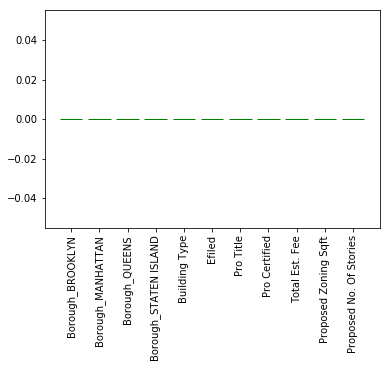

In [35]:
fig, ax = plt.subplots()
ax.bar(range(len(names)),lasso_coef)
ax.set_xticks(range(len(names)));
ax.set_xticklabels(names, rotation=90)
for i, v in enumerate(lasso_coef):
    if v < 0:
        ax.get_children()[i].set_color('red')
    else:
        ax.get_children()[i].set_color('green')

In [21]:
data['LogDur']= np.log(data['Duration'])

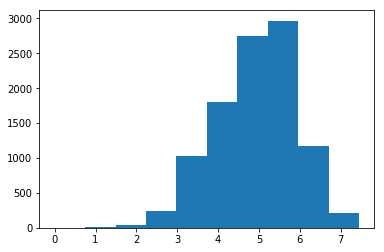

In [27]:
plt.hist(data['LogDur']);

#### Ridge Regression

In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [17]:
# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# Instantiate the ridge regression and fit the train data
ridge = Ridge(normalize=True, alpha=0.1)
ridge.fit(X_train, y_train)
# predict the values
ridge_pred = ridge.predict(X_test)
# compute the R2: how much of the variance in the y is explained by the model. 
ridge.score(X_test, y_test)

0.1621410932474645

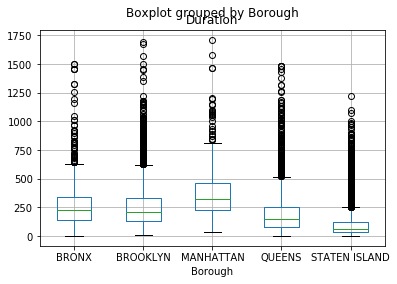

In [43]:
data.boxplot(column='Duration', by='Borough');

In [45]:
from sklearn.preprocessing import scale

In [46]:
data['Scaled_dur'] = scale(data['Duration'])

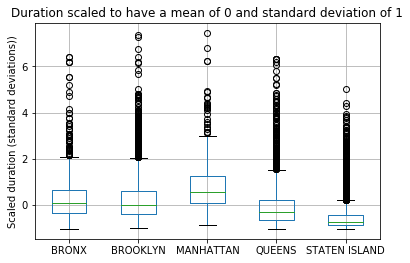

In [62]:
data.boxplot(column='Scaled_dur',by='Borough')
plt.suptitle('');
plt.xlabel('');
plt.ylabel('Scaled duration (standard deviations))');
plt.title('Duration scaled to have a mean of 0 and standard deviation of 1');